In [240]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [241]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [242]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [243]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [244]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect= True)

In [245]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [246]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [247]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [248]:
#Latest_date = Session("SELECT MAX(date)")
#Latest_date

In [249]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
recent_date


'2017-08-23'

In [250]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#1 year would be 2016-08-23
last_year = session.query(Measurement.date, func.avg(Measurement.prcp)).\
                    filter(Measurement.date >= last_twelve_months).\
                    group_by(Measurement.date).all()
#last_year


In [262]:
# Sort the dataframe by date

prec_date_df = pd.DataFrame(last_year, columns=['Date', 'Precipitation'])
prec_date_df.set_index('Date')
prec_date_df.head()

,Date,Precipitation
0,2016-08-24,1.555000
1,2016-08-25,0.077143
2,2016-08-26,0.016667
3,2016-08-27,0.064000
4,2016-08-28,0.516667


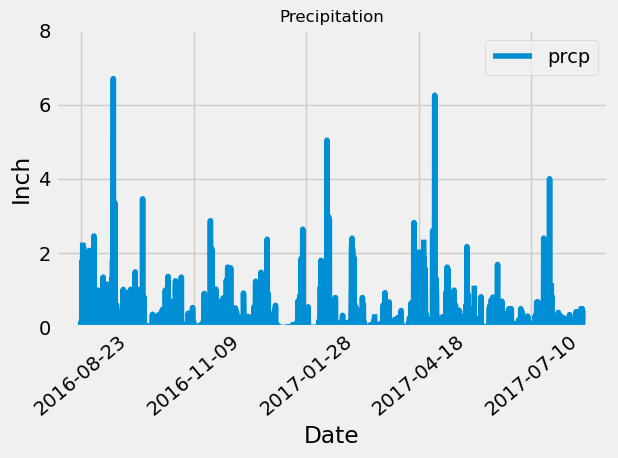

In [263]:
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
values = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-22').\
    order_by(Measurement.date).all()

# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column
values_df = pd.DataFrame(values)
values_final_df = values_df.set_index("date")
values_final_df

# Use Pandas Plotting with Matplotlib to plot the data

values_final_df.plot()
plt.title("Precipitation", size=12)
plt.ylim(0,8)
plt.xticks(rotation=40)
plt.xlabel('Date')
plt.ylabel('Inch')
plt.tight_layout()
plt.show()

In [264]:
# Use Pandas to calcualte the summary statistics for the precipitation data
values_final_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [265]:
# Design a query to calculate the total number stations in the dataset
stations_ds= session.query(Station.station).count()
stations_ds

9

In [272]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
    
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [267]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#combine max, min, and average  
mma_df = most_active_station[0][0]
session.query(func.max(Measurement.tobs),func.min(Measurement.tobs), func.avg(Measurement.tobs)).\
                filter(Measurement.station == mma_df).all()

[(85.0, 54.0, 71.66378066378067)]

(0.0, 80.0)

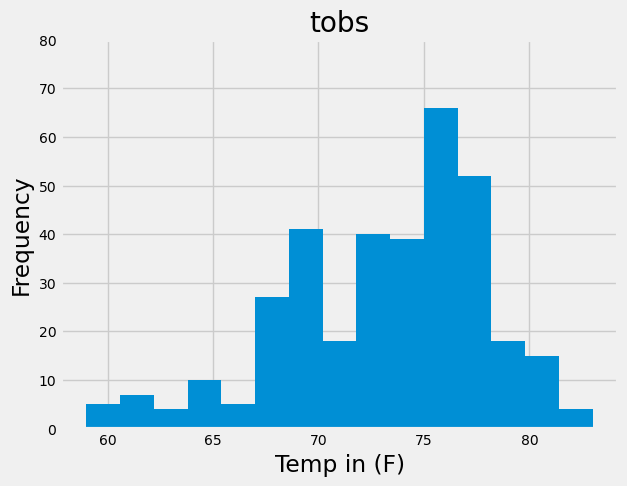

In [276]:
most_recent_date_station = session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.station == most_active_station_number).\
    order_by(Measurement.date.desc()).first()


# Create query saying to find dates 12 months before 2017-08-08 (thus > 2016-08-08), for our most active station
twelve_month_values = session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.station == most_active_station_number).\
    filter(Measurement.date > '2016-08-23').all()

# Plot
# Create series with just tobs from this 12 month period 
twelve_month_values_df = pd.DataFrame(twelve_month_values)
twelve_month_values_df 

hist = twelve_month_values_df.hist(bins=15) 

plt.xlabel('Temp in (F)')
plt.ylabel('Frequency')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0,80)

# Close session

In [269]:
# Close Session
session.close()